<a href="https://colab.research.google.com/github/annaklaracss/data_science-/blob/main/Data_Science_testando_hip%C3%B3teses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# carregando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Leitura dos dados

# idade de aponsentadoria
dados_idade_aposentadoria = pd.read_csv("/content/dados_idade_aposentadoria.csv")

# Tempo de Vida de uma Lâmpada
dados_vida_lampada = pd.read_csv("/content/dados_vida_lampada.csv")

# Altura dos funcionarios
dados_alturas = pd.read_csv("/content/dados_alturas.csv")

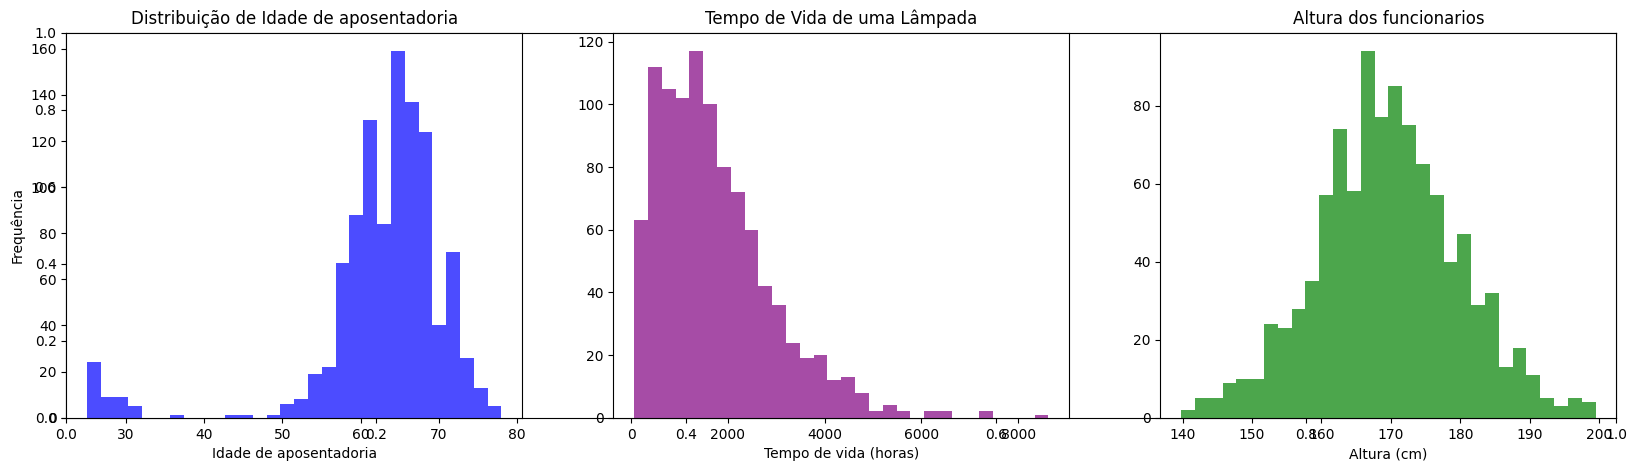

In [3]:
plt.subplots(figsize=(20,5))
plt.subplot(131)
plt.title('Distribuição de Idade de aposentadoria')
plt.xlabel('Idade de aposentadoria')
plt.ylabel('Frequência')
plt.hist(dados_idade_aposentadoria, bins=30 , alpha=0.7, color= 'blue')


plt.subplot(132)
plt.title('Tempo de Vida de uma Lâmpada')
plt.xlabel('Tempo de vida (horas)')
plt.hist(dados_vida_lampada, bins=30 , alpha=0.7, color= 'purple')

plt.subplot(133)
plt.title('Altura dos funcionarios')
plt.xlabel('Altura (cm)')
plt.hist(dados_alturas, bins=30 , alpha=0.7, color= 'green')


plt.show()




O código plt.subplot(131) é usado no Matplotlib para criar uma grade de subplots (múltiplos gráficos) dentro de uma única figura.

Vamos quebrar o significado dos números:
1: Indica o número de linhas na grade de subplots. Neste caso, há 1 linha.
3: Indica o número de colunas na grade de subplots. Neste caso, há 3 colunas.
1: Indica o índice do subplot atual. Neste caso, é o primeiro subplot na grade. Os índices começam em 1 e aumentam da esquerda para a direita e de cima para baixo.

Então, plt.subplot(131) cria uma grade de 1 linha por 3 colunas e ativa o primeiro subplot para que você possa plotar nele. Se você quisesse plotar no segundo subplot da mesma grade, usaria plt.subplot(132), e assim por diante.



In [4]:
#reamostragem

#tamanho da amostra
n=100

#quantidade de amostras
qnt=10000

#função de reamostragem e calculo de médias
def reamostragem_medias(dados, coluna,n, qnt):
  medias = [dados[coluna].sample(n, replace = True).mean() for _ in range(qnt)]
  return medias

Reamostragem" (Resampling em inglês) é um termo genérico que se refere a diversas técnicas utilizadas em estatística e aprendizado de máquina para extrair amostras repetidamente de um conjunto de dados existente.

Em resumo, a reamostragem é uma ferramenta poderosa e versátil que permite aos estatísticos e cientistas de dados explorar a variabilidade dos dados, testar hipóteses, validar modelos e lidar com desafios específicos, como o desequilíbrio de classes, de forma mais robusta e eficiente.

In [5]:
dados_idade_aposentadoria.head()#para saber o nome da coluna

,idade
0,66
1,66
2,60
3,61
4,57


In [6]:
dados_vida_lampada.head() #para saber o nome da coluna

,duracao
0,2238.462196
1,404.474833
2,358.025869
3,2193.463611
4,1072.377941


In [7]:
dados_alturas.head() #para saber o nome da coluna

,alturas
0,167.52
1,185.21
2,172.74
3,171.52
4,157.75


In [8]:
#realizando a reamostragem com função

media_idade= reamostragem_medias(dados_idade_aposentadoria, 'idade', n, qnt)
media_duracao = reamostragem_medias(dados_vida_lampada, 'duracao', n, qnt)
media_altura = reamostragem_medias(dados_alturas, 'alturas', n, qnt)



In [9]:
print('***** Medias populacionais *****')

print('idade',dados_idade_aposentadoria['idade'].mean())
print('duracao',dados_vida_lampada['duracao'].mean())
print('alturas',dados_alturas['alturas'].mean())

***** Medias populacionais *****
idade 62.70857142857143
duracao 1731.8036029420002
alturas 169.52022


In [10]:
#medias amostrais
def Average(list):
  return sum(list) / len(list)

print('***** Medias populacionais *****')

print('idade',Average(media_idade))
print('duracao',Average(media_duracao))
print('alturas',Average(media_altura))



***** Medias populacionais *****
idade 62.707853000000036
duracao 1733.5413165347268
alturas 169.5285285200007


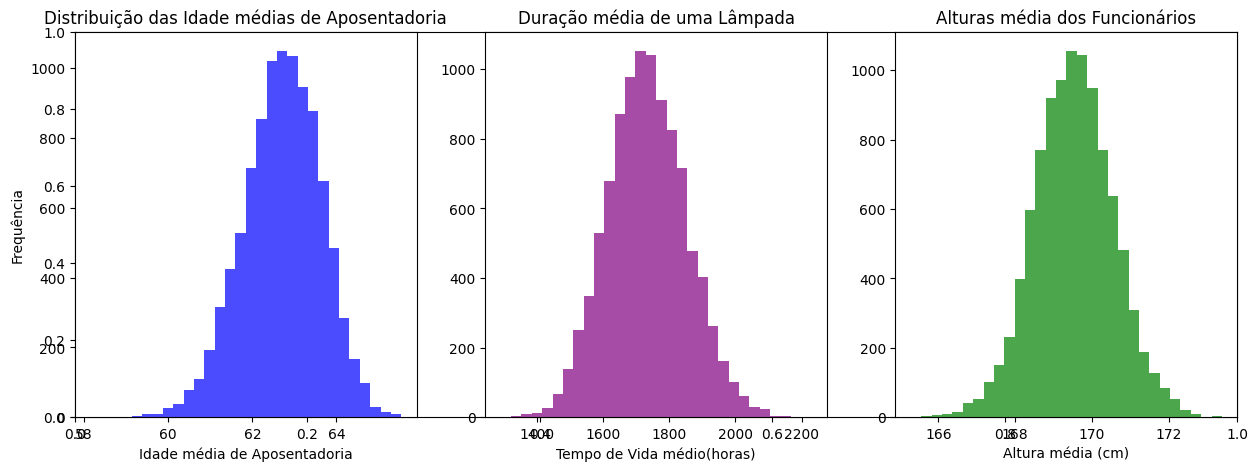

In [11]:
#como as medias estão distribuidas?

plt.subplots(figsize=(15, 5))
plt.subplot(131)
plt.title('Distribuição das Idade médias de Aposentadoria')
plt.xlabel('Idade média de Aposentadoria')
plt.ylabel('Frequência')
plt.hist(media_idade, bins=30, alpha=0.7, color='blue')

plt.subplot(132)
plt.hist(media_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')

plt.subplot(133)
plt.hist(media_altura, bins=30, alpha=0.7, color='green')
plt.title('Alturas média dos Funcionários')
plt.xlabel('Altura média (cm)')

plt.show()

teorema do limite central. Esse teorema é famoso na estatística para fazermos inferências, ou seja, generalizar a partir de uma amostra para uma população.


In [12]:
# média da nova amostra
media_nova_amostra = 1200

In [13]:
# media original
media_populacional = dados_vida_lampada['duracao'].mean()

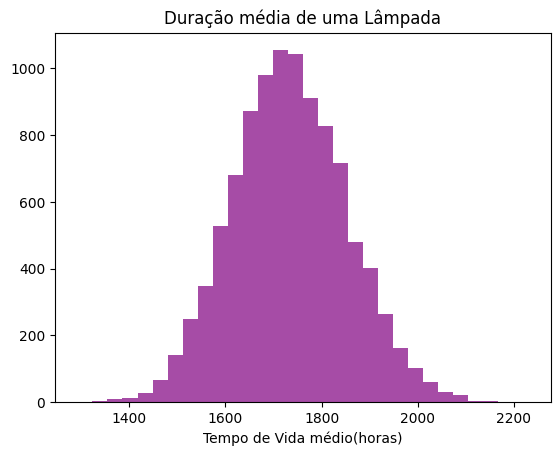

In [14]:
# Quão distante essa média está do comportamento?

plt.hist(media_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')
plt.annotate('.', xy=(media_nova_amostra, 0), xytext=(media_nova_amostra, 100), fontsize=8,
            arrowprops=dict(facecolor='green'))
plt.show()

In [15]:
# transformando medias_duração em DataFrame
duracao_amostras = pd.DataFrame({'medias_duracao': media_duracao})

In [16]:
# calculando informações
media_das_medias = duracao_amostras['medias_duracao'].mean()
EP = duracao_amostras['medias_duracao'].std()

print("*****  Medidas amostrais *****")
print("média:", media_das_medias )
print("Erro Padrão:", EP )

*****  Medidas amostrais *****
média: 1733.5413165347288
Erro Padrão: 118.9164009907902


In [17]:
# Quantos erros?
1732 - EP

1613.0835990092098

In [18]:
# Quantos erros?
1732 - 3*EP

1375.2507970276295

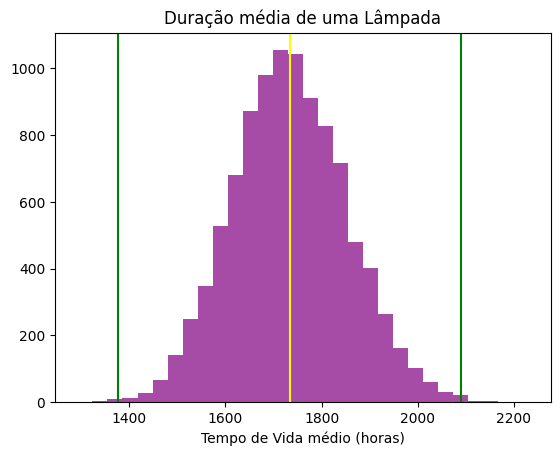

In [19]:
# Visualizando a quantidade de amostras entre 3EP +- da média.

plt.hist(media_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio (horas)')
plt.axvline(media_das_medias, color = "yellow")#colocando a linha (media) no grafico
plt.axvline(media_das_medias + 3*EP , color = "green")#colocando a linha (erro padrao) no grafico
plt.axvline(media_das_medias - 3*EP , color = "green")#colocando a linha (erro padrao) no grafico
plt.annotate('.', xy=(media_nova_amostra, 0), xytext=(media_nova_amostra, 100), fontsize=8,
            arrowprops=dict(facecolor='green'))
plt.show()

In [20]:
#quanto está no intervalo de +ou- dois desvio
qnt_obs = duracao_amostras[(duracao_amostras > media_das_medias - 3*EP) &
                          (duracao_amostras < media_das_medias + 3*EP)]


In [21]:
# quanto isso representa?
qnt_obs.count()/duracao_amostras.count()


,0
medias_duracao,0.9975


In [22]:
# quanto isso representa?
qnt_obs.count()/duracao_amostras.count()*100

,0
medias_duracao,99.75


In [23]:
# importando o stats
from scipy import stats

In [24]:
# levar em consideração essa amostra
dados_vida_lampada

# nível de confiança definido
confianca = 0.95

In [25]:
#informações para  calcular o IC

media = dados_vida_lampada['duracao'].mean()
desvio_padrao_amostral = dados_vida_lampada['duracao'].std()
tamanho_amostra = len(dados_vida_lampada)

In [26]:
# Calculando intervalo de confiança

intervalo_confianca = stats.norm.interval(confianca,
                                       loc=media ,
                                       scale=desvio_padrao_amostral/np.sqrt(tamanho_amostra)) #variabilidade do intervalo




In [27]:
# Visualizando os resultados

print("IC (95%):", intervalo_confianca)

IC (95%): (np.float64(1658.3741665835485), np.float64(1805.233039300452))


Atividade 1;

In [28]:
import pandas as pd

# Conjunto de dados TechTaste
df_techtaste = pd.DataFrame({'avaliacoes': [38, 44, 33, 42, 47, 33, 36, 39, 42, 36, 39, 34, 42, 42, 36, 43, 31, 35, 36, 41, 42, 30, 25, 38, 47, 36, 32, 45, 44, 45, 37, 48, 37, 36, 44, 49, 31, 45, 45, 40, 36, 50, 38, 34, 36, 42, 46, 49, 36, 34, 38, 31, 53, 40, 57, 40, 36, 42, 26, 50, 32, 43, 35, 37, 42, 30, 36, 43, 40, 43, 44, 52, 37, 51, 35, 47, 40, 50, 37, 49]})

In [29]:
df_techtaste.head()

,avaliacoes
0,38
1,44
2,33
3,42
4,47


In [30]:
#calculando o desvio padrao
desvio_padrao =  df_techtaste['avaliacoes'].std()
print(desvio_padrao)

6.421827887581661


In [31]:
#calculando a media
media = df_techtaste['avaliacoes'].mean()
print(media)

40.025


In [32]:
import numpy as np

In [33]:
# Calcula o tamanho da amostra
n = len('avaliacoes')
print(n)

10


In [34]:
# Calcula o erro padrão da média
erro_padrao_media = desvio_padrao / np.sqrt(n) #np.sqrt calcula a raiz quadrada do tamanho da amostra
print(erro_padrao_media)

2.030760286634578


In [35]:
import matplotlib.pyplot as plt

In [36]:
avaliacoes = np.array(df_techtaste)

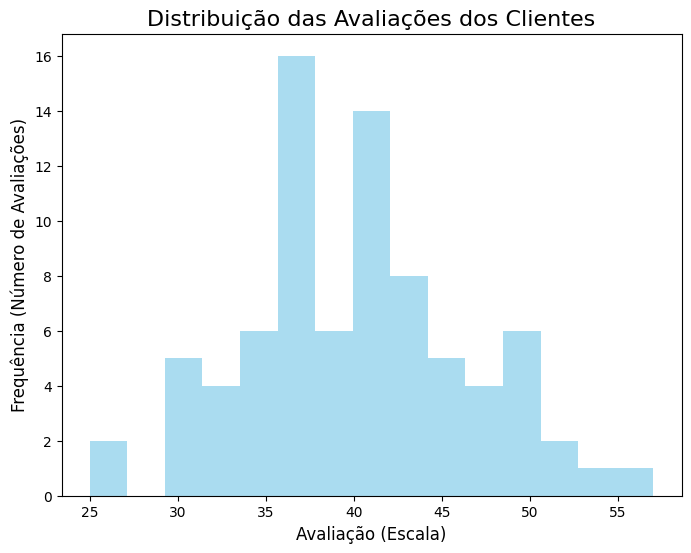

In [37]:
# Visualizando a distribuição das avaliações dos clientes.

plt.subplots(figsize=(8, 6))
plt.hist(avaliacoes, bins= 15, alpha=0.7, color='skyblue')
plt.title('Distribuição das Avaliações dos Clientes', fontsize=16)
plt.xlabel('Avaliação (Escala)', fontsize=12)
plt.ylabel('Frequência (Número de Avaliações)', fontsize=12)


plt.show()

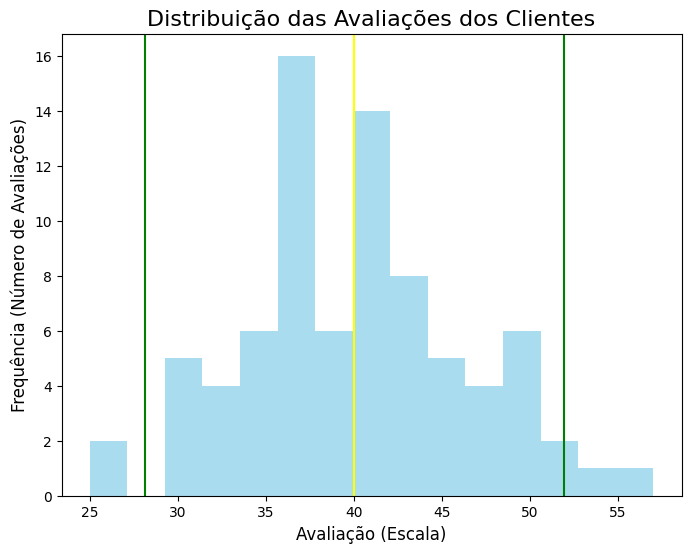

In [38]:
# Visualizando a distribuição das avaliações dos clientes.

plt.subplots(figsize=(8, 6))
plt.hist(avaliacoes, bins= 15, alpha=0.7, color='skyblue')
plt.title('Distribuição das Avaliações dos Clientes', fontsize=16)
plt.xlabel('Avaliação (Escala)', fontsize=12)
plt.ylabel('Frequência (Número de Avaliações)', fontsize=12)
plt.axvline(media, color = "yellow")#colocando a linha (media) no grafico
plt.axvline(media + 0.1*EP , color = "green")#colocando a linha (erro padrao) no grafico
plt.axvline(media - 0.1*EP , color = "green")#colocando a linha (erro padrao) no grafico

plt.show()

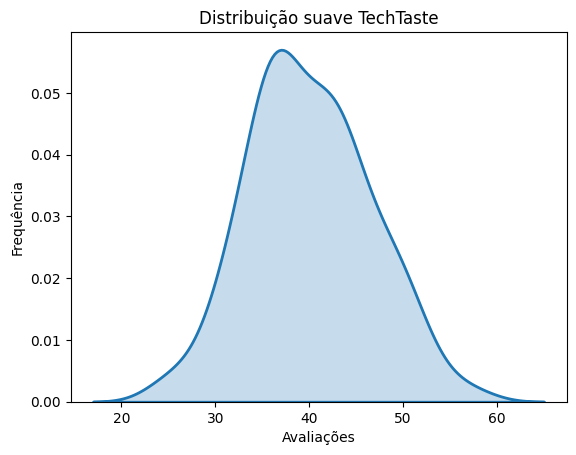

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(df_techtaste['avaliacoes'], linewidth=2, fill= True)

plt.xlabel('Avaliações')
plt.ylabel('Frequência')
plt.title('Distribuição suave TechTaste')
plt.show()

In [40]:
confianca= 0.90
intervalo_confianca = stats.norm.interval(confianca,
                                       loc=media ,
                                       scale=desvio_padrao/np.sqrt(n)) #variabilidade do intervalo
print(intervalo_confianca)

(np.float64(36.6846965770601), np.float64(43.365303422939895))


In [41]:
confianca= 0.95
intervalo_confianca = stats.norm.interval(confianca,
                                       loc=media ,
                                       scale=desvio_padrao/np.sqrt(n)) #variabilidade do intervalo
print(intervalo_confianca)

(np.float64(36.04478297696199), np.float64(44.00521702303801))


A largura do intervalo de confiança seria afetada se o nível de confiança fosse aumentado de 90% para 95%. Na verdade, o intervalo de confiança se tornaria mais largo

FORMULANDO HIPOTESE

In [42]:
hipotese = 1570

In [43]:
#dados amostrais

lamapadas_natalinas = pd.read_csv("/content/experimento_lampadas_natalinas.csv")


In [44]:
#para saber o nome da coluna do data frame

lamapadas_natalinas.head()


,Unnamed: 0,duracao
0,0,1541.121474
1,1,1523.495329
2,2,1521.732707
3,3,1523.280091
4,4,1530.643374


In [45]:
#media amostral de duração das lampadas

lamapadas_natalinas['duracao'].mean()

np.float64(1529.5081310675512)

In [46]:
# calculando o intervalo de confianca
# informações dadas pela industria

confianca = 0.95
desvio_padrao_populacional = 105
tamando_da_amostra = len(lamapadas_natalinas['duracao'])


In [47]:
# calculando o intervalo de confiança

intervalo = stats.norm.interval(confianca,
                                loc=1570,
                                scale= desvio_padrao_populacional/np.sqrt(tamando_da_amostra))

In [48]:
print('IC(95%):', intervalo)

IC(95%): (np.float64(1549.4203781623294), np.float64(1590.5796218376706))


Não temos prova que o valor da hipotese realmente funciona. Visto que, o valor contido não esta no intervalo.
Então nos resta rejeitar a proposta.

In [49]:
# quando estabelecemos o criterio de confiança estabelecemos a porcentagem que podemos errar.
# ou seja, se o nivel de confiança for de 95, podemos errar ate 5% de erro.
# Onde de fato ela não ira durar esses 1570


In [50]:
#existem dois tipos de erros, sendo eles;
# Erro do tipo 1: ocorre quando a hipótese nula é rejeitada quando, na verdade, ela é verdadeira.
#  Em outras palavras, o erro é cometido ao rejeitar uma verdade.

# Erro do tipo 2: ocorre quando a hipótese nula não é rejeitada quando, na verdade, ela é falsa.
# Em outras palavras, o erro é cometido ao não rejeitar uma falsidade.

# O erro do tipo 1 é conhecido pela letra Alpha e o erro do tipo 2 é conhecido como a letra Betha.



In [51]:
#importando o teste z do stantsmodels
from statsmodels.stats.weightstats import ztest

In [52]:
# executando o teste

stats,p_valor= ztest(x1=lamapadas_natalinas['duracao'], value=1570, alternative= 'two-sided')



In [53]:
#media_amostral
lamapadas_natalinas['duracao'].mean()

np.float64(1529.5081310675512)

In [54]:
print('{:.4f}'.format(p_valor))

0.0000


In [55]:
# verifica a hipótese nula com base no valor-p

if p_valor < 0.05:
    conclusao = "Rejeitar a hipótese nula"
else:
    conclusao = "Não rejeita a hipótese nula"

print("Conclusão:", conclusao)

Conclusão: Rejeitar a hipótese nula


teste bilateral procura evidências em ambas as direções (superior e inferior)  enquanto o teste unilateral procura evidências em apenas uma direção mas pode ser para esquerda ou direita.


Conseguimos facilmente identificar esse tipo de teste quando a hipótese alternativa indica que a média é diferente de um valor específico. Vamos verificar um exemplo de hipótese:

Hipótese Nula (H0): A média é igual a 20.
Hipótese Alternativa (H1): A média é diferente de 20.


teste unilateral a direita ou teste unilateral superior (media maior que o valor especifico).

teste unilateral a esquerda ou teste unilateral inferior (media menor que o valor especifico)

In [56]:
# Tempo de resposta em minutos para 25 solicitações de suporte
tempo_resposta = [28, 32, 29, 31, 30, 33, 28, 30, 31, 29,
                  30, 32, 29, 31, 30, 33, 28, 30, 31, 29,
                  30, 32, 24, 29, 30]

In [61]:
np.mean(tempo_resposta)

np.float64(29.96)

In [66]:
#importando o comando para testar a hipotese
from scipy.stats import ttest_1samp

In [71]:
#realizando o teste unilateral na amostra
t_statistic, p_valor = ttest_1samp(tempo_resposta, 30, alternative= 'less')

In [72]:
print(p_valor)

0.4585970095667924


In [73]:
print(t_statistic)

-0.10506930292746224
